<table>
  <tr><td>
  </td></tr>
  <tr><td align="center">
    <b>Segmentación de Bordes
  </td></tr>
</table>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [114]:
img  = cv2.imread('./img/iphone.jpg')

In [115]:
imG = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [116]:
#Cuatro canales para transparencia
imgT = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)

In [117]:
canny = cv2.Canny(imG, 0, 80)

Text(0.5, 1.0, 'Canny')

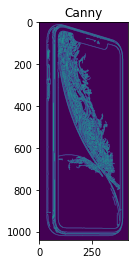

In [118]:
cv2.imshow('Canny',canny)
cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(canny)
plt.title("Canny")

In [119]:
#Utilizar dilatacion para volver un poco mas grueso las lineas y mejorar segmentacion
kernel = np.ones((5,5), np.uint8)
bordes = cv2.dilate(canny, kernel)

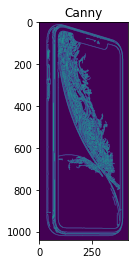

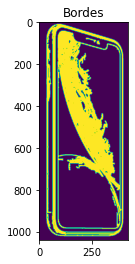

In [120]:
cv2.imshow('Canny',canny)
cv2.imshow('Bordes',bordes)
cv2.waitKey()
cv2.destroyAllWindows()

plt.imshow(canny)
plt.title("Canny")
plt.show()
plt.imshow(bordes)
plt.title("Bordes")
plt.show()

In [121]:
#Hallando mascara
_,contours,_ =cv2.findContours(bordes, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [122]:
#Crea mascara en objetos
objetos = bordes.copy()
cv2.drawContours(objetos, [max(contours, key = cv2.contourArea)], -1, 255, thickness = -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

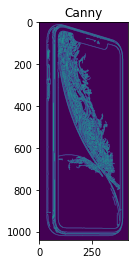

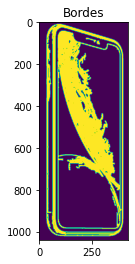

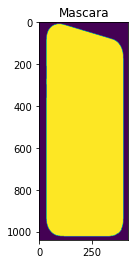

In [123]:
cv2.imshow('Canny',canny)
cv2.imshow('Bordes',bordes)
cv2.imshow('Mascara',objetos)
cv2.waitKey()
cv2.destroyAllWindows()

plt.imshow(canny)
plt.title("Canny")
plt.show()
plt.imshow(bordes)
plt.title("Bordes")
plt.show()
plt.imshow(objetos)
plt.title("Mascara")
plt.show()

In [124]:
#Segmentar celular utilizando Mascara
objetos = objetos/255

In [125]:
img.shape

(1040, 425, 3)

In [126]:
seg = np.zeros(imgT.shape)

In [127]:
seg[:,:,0] = objetos*imgT[:,:,0]+255*(objetos==0)
seg[:,:,1] = objetos*imgT[:,:,1]+255*(objetos==0)
seg[:,:,2] = objetos*imgT[:,:,2]+255*(objetos==0)
seg[:,:,3] = objetos*imgT[:,:,3]
seg=np.uint8(seg)

In [128]:
cv2.imwrite("trans.png",seg)

True

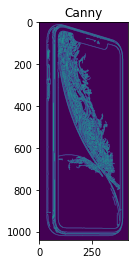

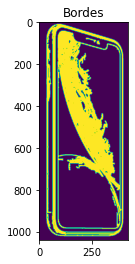

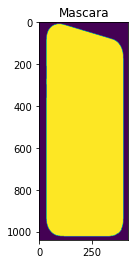

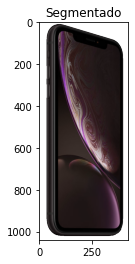

In [129]:
cv2.imshow('Canny',canny)
cv2.imshow('Bordes',bordes)
cv2.imshow('Mascara',objetos)
cv2.imshow('Segmentado',seg)
cv2.waitKey()
cv2.destroyAllWindows()

plt.imshow(canny)
plt.title("Canny")
plt.show()
plt.imshow(bordes)
plt.title("Bordes")
plt.show()
plt.imshow(objetos)
plt.title("Mascara")
plt.show()
plt.imshow(seg)
plt.title("Segmentado")
plt.show()